# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [76]:
#Create a query url
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={temp_units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
#Create a list to save weather data of each city
name_city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("-------------------------------")

#Loop to retrieve data for each city in the list
ctr = 1
for city in cities:  
    try: 
        response = requests.get(query_url + city).json() 
        name_city.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        print(f"Processing Record {ctr} | {city_record}")
        ctr = ctr + 1    
        time.sleep(1)
        
    except:
        print("City not found. Skipping...")
    continue
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Springfield
Processing Record 2 | Dubti
Processing Record 3 | Kununurra
Processing Record 4 | Ilo
Processing Record 5 | Luderitz
Processing Record 6 | Shenzhen
Processing Record 7 | Bluff
Processing Record 8 | Masallatah
Processing Record 9 | Tessalit
Processing Record 10 | Takoradze
Processing Record 11 | Chokurdakh
City not found. Skipping...
Processing Record 12 | Sawtell
City not found. Skipping...
Processing Record 13 | Ilhabela
Processing Record 14 | Bhan
Processing Record 15 | Rikitea
Processing Record 16 | Sitka
Processing Record 17 | Kutum
Processing Record 18 | Kavieng
Processing Record 19 | Tuktoyaktuk
Processing Record 20 | Kahului
Processing Record 21 | Kodiak
Processing Record 22 | Hobart
Processing Record 23 | Punta Arenas
Processing Record 24 | Jamestown
Processing Record 25 | North Platte
Processing Record 26 | Mataura
Processing Record 27 | Pevek
Processing Recor

Processing Record 230 | Sao Jose da Coroa Grande
Processing Record 231 | Castro
City not found. Skipping...
Processing Record 232 | Vrangel
Processing Record 233 | Shingu
Processing Record 234 | Alofi
City not found. Skipping...
Processing Record 235 | Cabra
Processing Record 236 | Poindimie
Processing Record 237 | Souillac
Processing Record 238 | Acapulco de Juarez
Processing Record 239 | Bumba
Processing Record 240 | Buin
City not found. Skipping...
Processing Record 241 | Mujiayingzi
Processing Record 242 | Barra de Tecoanapa
Processing Record 243 | Baiyin
Processing Record 244 | Lander
Processing Record 245 | Kaarina
Processing Record 246 | Kpalime
Processing Record 247 | Lucapa
Processing Record 248 | Monte Azul Paulista
Processing Record 249 | Grindavik
City not found. Skipping...
Processing Record 250 | Bilibino
Processing Record 251 | Fortuna
Processing Record 252 | Sinnamary
Processing Record 253 | Umm Kaddadah
Processing Record 254 | Port Blair
Processing Record 255 | Zhigans

Processing Record 460 | Bat Yam
Processing Record 461 | Mae Ramat
Processing Record 462 | Haapiti
Processing Record 463 | Shakawe
Processing Record 464 | Lisakovsk
Processing Record 465 | Toora-Khem
Processing Record 466 | Sarkand
Processing Record 467 | Kopervik
City not found. Skipping...
Processing Record 468 | Presidencia Roque Saenz Pena
Processing Record 469 | Jinxiang
Processing Record 470 | Chabahar
Processing Record 471 | Dorgos
Processing Record 472 | Ola
Processing Record 473 | Bosobolo
Processing Record 474 | Kishanpur
Processing Record 475 | Srednekolymsk
Processing Record 476 | Algiers
Processing Record 477 | Tuatapere
Processing Record 478 | Hihya
Processing Record 479 | Adrar
Processing Record 480 | Moree
Processing Record 481 | Marzuq
Processing Record 482 | Mahajanga
Processing Record 483 | Hwange
Processing Record 484 | Talnakh
Processing Record 485 | Zapolyarnyy
Processing Record 486 | Opuwo
Processing Record 487 | Cap-aux-Meules
Processing Record 488 | Saint-August

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
#Create a dictonary
city_weather = {
    "City": name_city,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng" : lng, 
    "Max Temp" : max_temp,
    "Wind Speed":wind_speed}

#convert to dataframe
city_weather_df = pd.DataFrame(city_weather)

#Save dataframe to CSV
city_weather_df.to_csv(output_data_file)

#Count
city_weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [79]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Springfield,1,US,1580678181,22,37.22,-93.30,75.20,10.29
1,Dubti,0,ET,1580678183,55,11.74,41.09,78.26,8.30
2,Kununurra,90,AU,1580677939,88,-15.77,128.73,77.00,5.82
3,Ilo,100,PE,1580678185,77,-17.64,-71.34,73.27,8.43
4,Luderitz,0,NA,1580677915,90,-26.65,15.16,63.43,24.65


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

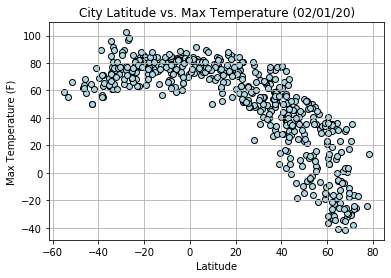

<Figure size 432x288 with 0 Axes>

In [80]:
latitude = city_weather_df["Lat"]
temperature = city_weather_df["Max Temp"]

plt.scatter(latitude, temperature, marker="o", facecolors="lightblue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (02/01/20)")
plt.grid(True)
plt.show()

plt.savefig("../Figures/Lat_vs_Temp.png")

#### Latitude vs. Humidity Plot

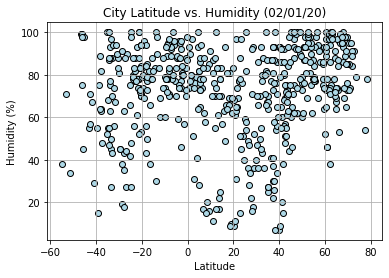

<Figure size 432x288 with 0 Axes>

In [81]:
humidity = city_weather_df["Humidity"]

plt.scatter(latitude, humidity, marker="o", facecolors="lightblue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (02/01/20)")
plt.grid(True)
plt.show()

plt.savefig("../Figures/Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

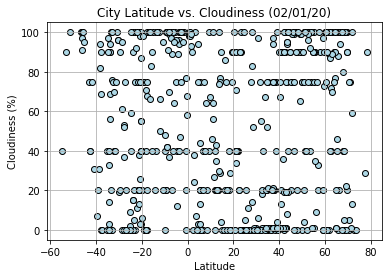

<Figure size 432x288 with 0 Axes>

In [82]:
cloudiness = city_weather_df["Cloudiness"]

plt.scatter(latitude, cloudiness, marker="o", facecolors="lightblue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (02/01/20)")
plt.grid(True)
plt.show()

plt.savefig("../Figures/Lat_vs_Cloud.png")

#### Latitude vs. Wind Speed Plot

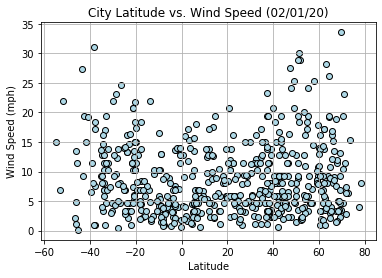

<Figure size 432x288 with 0 Axes>

In [83]:
wind_speed = city_weather_df["Wind Speed"]

plt.scatter(latitude, wind_speed, marker="o", facecolors="lightblue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (02/01/20)")
plt.grid(True)
plt.show()

plt.savefig("../Figures/Latitude_vs_Wind_Speed.png")

## Linear Regression

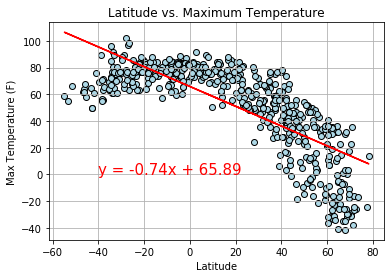

In [85]:
# OPTIONAL: Create a function to create Linear Regression plots

x_values = city_weather_df["Lat"]
y_values = city_weather_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-40,0), fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Maximum Temperature")
          
plt.grid(True)
plt.savefig("../Figures/Linear_Regression.png")
plt.show()

In [86]:
# Create Northern and Southern Hemisphere DataFrames
nHemispere_df = city_weather_df[city_weather_df["Lat"] >= 0]
sHemispere_df = city_weather_df[city_weather_df["Lat"] <= 0]
#nHemispere_df
#sHemispere_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

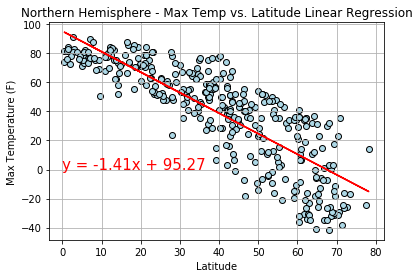

The r-squared is: -0.8371375074216191


<Figure size 432x288 with 0 Axes>

In [87]:
x_values = nHemispere_df["Lat"]
y_values = nHemispere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0,0), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_NHemi_TempxLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

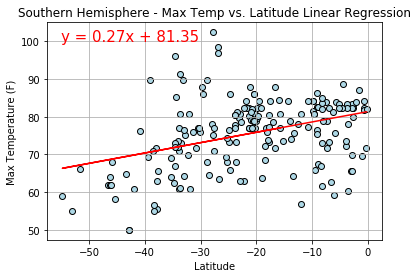

The r-squared is: 0.38230459908727404


<Figure size 432x288 with 0 Axes>

In [90]:
x_values = sHemispere_df["Lat"]
y_values = sHemispere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,100), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_SHemi_TempxLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

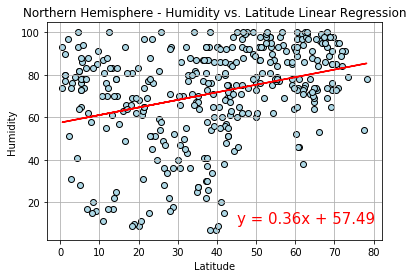

The r-squared is: 0.3175289624969525


<Figure size 432x288 with 0 Axes>

In [91]:
x_values = nHemispere_df["Lat"]
y_values = nHemispere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (45,10), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_NHemi_HumidxLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

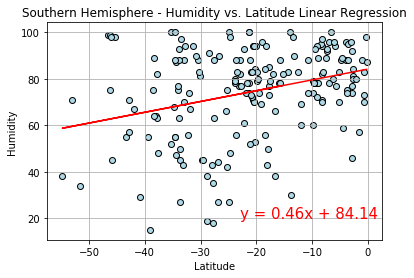

The r-squared is: 0.309376446425727


<Figure size 432x288 with 0 Axes>

In [92]:
x_values = sHemispere_df["Lat"]
y_values = sHemispere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-23,20), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_SHemi_HumidxLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

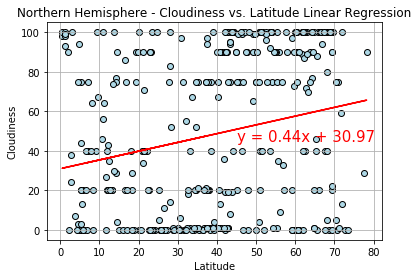

The r-squared is: 0.22185398452627636


<Figure size 432x288 with 0 Axes>

In [94]:
x_values = nHemispere_df["Lat"]
y_values = nHemispere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (45,45), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_NHemi_CloudxLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

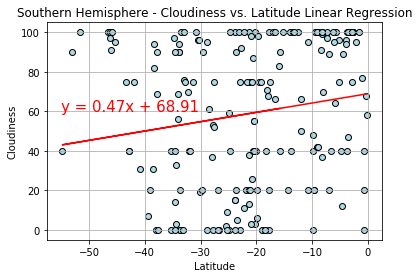

The r-squared is: 0.16447183776417262


<Figure size 432x288 with 0 Axes>

In [96]:
x_values = sHemispere_df["Lat"]
y_values = sHemispere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,60), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_SHemi_CloudxLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

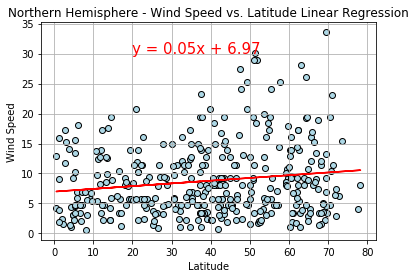

The r-squared is: 0.15458418234124563


<Figure size 432x288 with 0 Axes>

In [97]:
x_values = nHemispere_df["Lat"]
y_values = nHemispere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,30), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_NHemi_WindxLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

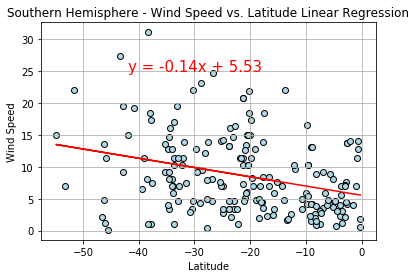

The r-squared is: -0.3112541654386084


<Figure size 432x288 with 0 Axes>

In [99]:
x_values = sHemispere_df["Lat"]
y_values = sHemispere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="lightblue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-42,25), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue}")

plt.savefig("../Figures/LR_SHemi_WindxLat.png")

# OBSERVATIONS

1. Latitude vs Max Temperature
The maximum temperature is highest in cities closest to the equator, and the temperature goes down as cities go further from the equator.

2. Latitude vs Humidity
Humidity is lowest at the south pole (latitude = -90) and highest at the north pole (latitude = +90).

3. Latitude vs Cloudiness
There is no observable patterns in the distribution of cloudiness between the Northern and the Southern hemisphere other than it is more cloudy in the Northern hemisphere.

4. Latitude vs Wind Speed
Wind speed is blowing consistently from east to west in the Northern hemisphere.  However, on the other side of the equator, wind speed seem consistent closer to the equator and increases in various degrees in cities further from the equator.

